In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Collection
[sadiq@dibru.ac.in](sadiq@dibru.ac.in)

In [ ]:
data=pd.read_csv('Thesis_data.csv')

# Data Preprocessing

### Showing first 20 rows from the data

In [ ]:
data.head()

,Performance,Gender,Caste,Coaching,Time,X_education,XII_education,Medium,X_performance,XII_performance,Father_Occupation,Mother_Occupation,target
0,'Excellent','male','General','NO','ONE','SEBA','AHSEC','ENGLISH','Excellent','Excellent','DOCTOR','OTHERS',Success
1,'Excellent','male','OBC','WA','TWO','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','HOUSE_WIFE',Success
2,'Excellent','male','OBC','OA','TWO','OTHERS','CBSE','ENGLISH','Excellent','Excellent','BUSINESS','HOUSE_WIFE',Success
3,'Excellent','male','General','WA','ONE','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','SCHOOL_TEACHER',Success
4,'Excellent','male','General','OA','TWO','SEBA','CBSE','ENGLISH','Excellent','Excellent','COLLEGE_TEACHER','HOUSE_WIFE',Success


In [ ]:
target = data['Performance'].map({"'Excellent'":'Success', "'Vg'":'Success', "'Good'":'Success', "'Average'":'Poor Performance'})

In [ ]:
target.value_counts()

Success             509
Poor Performance    157
Name: Performance, dtype: int64

### Showing the list of columns available on the data

In [ ]:
print(data.columns)

Index(['Performance', ' Gender', 'Caste', 'Coaching', 'Time', 'X_education',
       'XII_education', 'Medium', 'X_performance', 'XII_performance',
       'Father_Occupation', 'Mother_Occupation'],
      dtype='object')


### Printing the total number of columns available on the data

In [ ]:
print(len(data.columns))

12


# Information about the data
* Performance       - Performance of the student (Excellent, Very good, Good and Average)
* Gender            - Gender of the student (Male and Female)
* Caste             - Student Caste (General, OBC(Other Backward Class), SC(Scheduled Caste 'Dalit'), ST(Scheduled Tribe 'Adhibasi'))
* Coaching          - Whether the Candidate attend the coaching class Within assam(WA), Outside Assam(OA) or No Coaching(NO)
* X_education       - Name of the Board where the candidate studied at the class X level
* XII_education     - Name of the Board where the candidate studied at the class XII level
* Medium            - Medium of the instruction for the study at the class XII level
* X_Performance     - Performance of the student at the class X Standard
* XII_ performance  - Performance of the student at the class XII Standard
* Father_Occupation - The Occupation of the Student's Father
* Mother_Occupation - The Occupation of the Student's Mother

# Dropping the Time column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Performance        666 non-null    object
 1    Gender            666 non-null    object
 2   Caste              666 non-null    object
 3   Coaching           666 non-null    object
 4   Time               666 non-null    object
 5   X_education        666 non-null    object
 6   XII_education      666 non-null    object
 7   Medium             666 non-null    object
 8   X_performance      666 non-null    object
 9   XII_performance    666 non-null    object
 10  Father_Occupation  666 non-null    object
 11  Mother_Occupation  666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


# Data Description
* There are total 667 number of rows on the data
* Performance column has four unique entries ('Excellent' , 'Very Good', 'Good' and 'Average') and among these entries most frequent entries is 'Good'
* Gender column has two unique entried ('Male' and 'Female') and among these entries more frequent entries is 'Male'
* Caste column has 4 unique entries ('General', 'OBC', 'SC', 'ST') and among these entries most frequent entries is 'General'
* Coaching column has 3 unique entries ('WA', 'OA', 'NO') and among these entries most frequent entries is 'WA'
* X_education column has 3 unique entries ('CBSE', 'SEBA' and 'Others) and among these entries most frequent entries is 'SEBA'
* XII_education column has 3 unique entries ('CBSE', 'AHSEC' and 'Others') and among these entries most frequent entries is 'AHSEC'
* Medium column has 3 unique entries ('English', 'Assamese', and 'Others') and among these entries most frequent entries is 'English'
* X_performance column has 4 unique entries ('Excellent' , 'Very Good', 'Good' and 'Average') and among these entries most frequent entries is 'Excellent'
* XII_performance column has 4 unique entries ('Excellent' , 'Very Good', 'Good' and 'Average') and among these entries most frequent entries is 'Excellent'
* Father_Occupation column has 8 unique entries (‘DOCTOR’,‘SCHOOL_TEACHER’,‘BUSINESS’,‘COLLEGE_TEACHER’,‘OTHERS’,‘BANK_OFFICIAL’,‘ENGINEER’,‘CULTIVATOR’) and among these entries most frequent entries is 'OTHERS'
* Mother_Occupation column has 8 unique entries (‘OTHERS’,‘HOUSE_WIFE’,‘SCHOOL_TEACHER’,‘DOCTOR’,‘COLLEGE_TEACHER’,‘BANK_OFFICIAL’,‘BUSINESS’,‘CULTIVATOR’,‘ENGINEER’) and among these entries most frequent entries is 'HOUSE_WIFE'

In [ ]:
data.describe().T

,count,unique,top,freq
Performance,666,4,'Good',210
Gender,666,2,'male',355
Caste,666,4,'General',329
Coaching,666,3,'WA',449
Time,666,6,'TWO',368
X_education,666,3,'SEBA',396
XII_education,666,3,'AHSEC',368
Medium,666,3,'ENGLISH',536
X_performance,666,4,'Excellent',511
XII_performance,666,4,'Excellent',398


# There are no missing values in the data

In [ ]:
data.isnull().sum()

Performance          0
 Gender              0
Caste                0
Coaching             0
Time                 0
X_education          0
XII_education        0
Medium               0
X_performance        0
XII_performance      0
Father_Occupation    0
Mother_Occupation    0
dtype: int64

# In general male are performing better than female 
## This might be the case due to the fact that there are more male student present in the sample than the female student

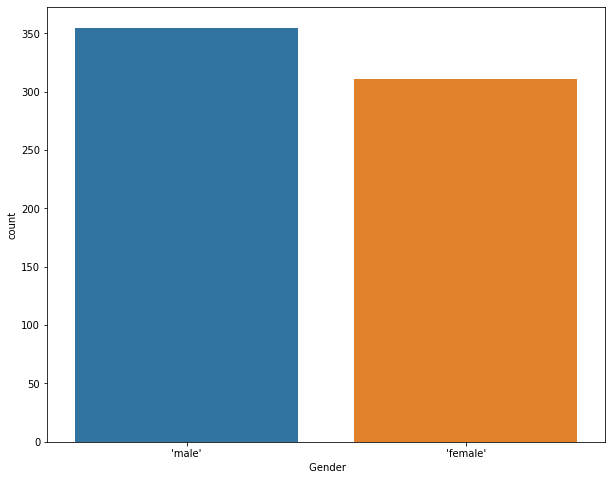

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=data[' Gender'])
plt.show()

# dataset is imbalanced 
## high number of excellent performance and very low average performance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


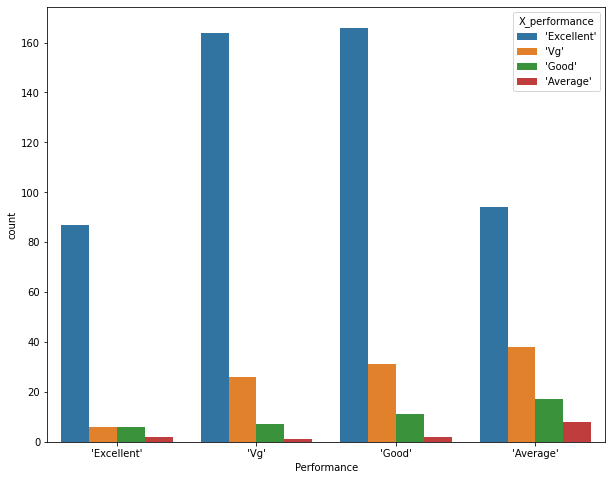

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data['Performance'], hue=data['X_performance'])
plt.show()

In [ ]:
X = pd.get_dummies(data[[' Gender','Caste','Coaching','X_education', 'XII_education', 'Medium','Father_Occupation', 'Mother_Occupation']], prefix_sep='_', drop_first=True)

In [ ]:
y = data['Performance'].map({"'Excellent'": 1, "'Vg'":1, "'Good'":1, "'Average'":0})
time = data['Time'].map({"'ONE'":1, "'TWO'":2, "'THREE'":3, "'FOUR'":4, "'FIVE'":5, "'SEVEN'":7})
X_edu = data['X_performance'].map({"'Excellent'": 3, "'Vg'":2, "'Good'":1, "'Average'":0})
XII_edu = data['XII_performance'].map({"'Excellent'": 3, "'Vg'":2, "'Good'":1, "'Average'":0})

In [ ]:
X['Time'] = time
X['X_edu'] = X_edu
X['XII_edu']=XII_edu

In [ ]:
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smk = SMOTETomek()
X_, y_ = smk.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.score(X_train, y_train)

0.984

In [ ]:
#dt_pred = dt_model.predict(X_test)

# Creating the dataframe of the y_test data and predicted data to compare the result

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#print (classification_report(y_test, dt_pred))

In [ ]:
#plt.figure(figsize=(10,6))
#print (sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='g', cmap='Blues'))
#plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_classifier.score(X_train, y_train)

0.9840637450199203

In [ ]:
#print(classification_report(y_test, rf_pred))
#print(sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='g', cmap="Blues"))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_X = StandardScaler()
X_trains = st_X.fit_transform(X_train)
X_tests = st_X.transform(X_test)

In [ ]:
log_classifier = LogisticRegression().fit(X_trains, y_train)

In [ ]:
log_classifier.score(X_trains, y_train)

0.9

In [ ]:
svm_classifier = SVC(probability=True).fit(X_trains, y_train)
svm_classifier.score(X_trains, y_train)

0.9133333333333333

In [ ]:
knn_classifier = KNeighborsClassifier().fit(X_trains, y_train)
knn_classifier.score(X_trains, y_train)

0.9013333333333333

In [ ]:
nb_classifier = GaussianNB().fit(X_trains, y_train)

In [ ]:
nb_classifier.score(X_trains, y_train)

0.6066666666666667

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_cv_score = cross_val_score(rf_classifier, X_train, y_train, cv=10)
print(rf_cv_score)
print(rf_cv_score.mean())

[0.84       0.92       0.89333333 0.89333333 0.94666667 0.94666667
 0.94666667 0.89333333 0.85333333 0.94666667]
0.908


In [ ]:
log_cv_score = cross_val_score(log_classifier, X_trains, y_train, cv=10)
print(log_cv_score)
print(log_cv_score.mean())

[0.85333333 0.92       0.85333333 0.90666667 0.89333333 0.85333333
 0.90666667 0.88       0.88       0.86666667]
0.8813333333333333


In [ ]:
dt_cv_score = cross_val_score(dt_model, X_train, y_train, cv=10)
print(dt_cv_score)
print(dt_cv_score.mean())

[0.78666667 0.92       0.90666667 0.84       0.93333333 0.8
 0.89333333 0.90666667 0.81333333 0.85333333]
0.8653333333333333


In [ ]:
knn_cv_score = cross_val_score(knn_classifier, X_trains, y_train, cv=10)
print(knn_cv_score)
print(knn_cv_score.mean())

[0.82666667 0.86666667 0.77333333 0.86666667 0.85333333 0.85333333
 0.86666667 0.88       0.81333333 0.94666667]
0.8546666666666667


In [ ]:
svm_cv_score = cross_val_score(svm_classifier, X_trains, y_train, cv=10)
print(svm_cv_score)
print(svm_cv_score.mean())

[0.81333333 0.92       0.88       0.89333333 0.92       0.82666667
 0.89333333 0.86666667 0.88       0.90666667]
0.8800000000000001


In [ ]:
nb_cv_score = cross_val_score(nb_classifier, X_trains, y_train, cv=10)
print(nb_cv_score)
print(nb_cv_score.mean())

[0.66666667 0.56       0.57333333 0.58666667 0.58666667 0.61333333
 0.62666667 0.58666667 0.64       0.62666667]
0.6066666666666667


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
rf_params = {'n_estimators':[int(x) for x in np.linspace(10,3000, 50)],
         'criterion':['gini', 'entropy'],
         'max_depth':[int(x) for x in np.linspace(10,3000, 50)],
         'min_samples_leaf':[ x for x in range(1,31)],
         'max_features':['auto','sqrt','log2',None],
         'min_samples_split': [x for x in range(2,50)]
         }

In [ ]:
rf_CV = RandomizedSearchCV(rf_classifier,rf_params,n_iter=100, scoring='accuracy', cv=10)
rf_CV.fit(X_train, y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
print(rf_CV.best_params_)
print(rf_CV.best_score_)

{'n_estimators': 1352, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1901, 'criterion': 'gini'}
0.8933333333333333


In [ ]:
rf_param = {'n_estimators':[int(x) for x in np.linspace(900, 1000, 20)],
         'criterion':['gini'],
         'max_depth':[int(x) for x in np.linspace(2000,3000, 20)],
         'min_samples_leaf':[1],
         'max_features':['sqrt'],
         'min_samples_split': [6]
         }

In [ ]:
rf_GCV = GridSearchCV(rf_classifier,rf_param, scoring='accuracy', cv=10)
rf_GCV.fit(X_train, y_train)
print(rf_GCV.best_params_)
print(rf_GCV.best_score_)

{'criterion': 'gini', 'max_depth': 3000, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 989}
0.9106666666666667


In [ ]:
rf1_param = {'n_estimators':[int(x) for x in np.linspace(900, 1000, 30)],
         'criterion':['gini'],
         'max_depth':[int(x) for x in np.linspace(3000, 4000, 30)],
         'min_samples_leaf':[1],
         'max_features':['sqrt'],
         'min_samples_split': [6]
         }

In [ ]:
rf1_GCV = GridSearchCV(rf_classifier,rf1_param, scoring='accuracy', cv=10)
rf1_GCV.fit(X_train, y_train)
print(rf1_GCV.best_params_)
print(rf1_GCV.best_score_)

{'criterion': 'gini', 'max_depth': 3758, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 910}
0.9093333333333333


In [ ]:
dt_params = {'criterion':['gini', 'entropy'],
             'splitter':['best','random'],
             'max_depth':[int(x) for x in np.linspace(10,3000, 25)],
             'min_samples_leaf':[ x for x in range(1,30)],
             'max_features':['auto','sqrt','log2',None],
             'min_samples_split': [x for x in range(2,30)]
             }

In [ ]:
dt_CV = RandomizedSearchCV(dt_model,dt_params,n_iter=100, scoring='accuracy', cv=10)
dt_CV.fit(X_train, y_train)
print(dt_CV.best_params_)
print(dt_CV.best_score_)

{'splitter': 'random', 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 882, 'criterion': 'entropy'}
0.8706666666666667


In [ ]:
dt_param ={'criterion':['entropy'],
             'splitter':['random'],
             'max_depth':[int(x) for x in np.linspace(100,200, 25)],
             'min_samples_leaf':[ x for x in range(1,10)],
             'max_features':['auto','sqrt','log2',None],
             'min_samples_split': [x for x in range(2,10)]
             }

In [ ]:
dt_GCV = GridSearchCV(dt_model,dt_param, scoring='accuracy', cv=10)
dt_GCV.fit(X_train, y_train)
print(dt_GCV.best_params_)
print(dt_GCV.best_score_)

{'criterion': 'entropy', 'max_depth': 191, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
0.8866666666666667


In [ ]:
svm_params = {'kernel':['poly','linear','rbf','sigmoid'],
              'C':[0.001, 0.002, 0.005, 0.1, 0.2, 0.5, 1,10,100,1000],
              'degree':[x for x in range(1,10)]
              }

In [ ]:
svm_CV = RandomizedSearchCV(svm_classifier,svm_params,n_iter=100, scoring='accuracy', cv=10)
svm_CV.fit(X_trains, y_train)
print(svm_CV.best_params_)
print(svm_CV.best_score_)

{'kernel': 'linear', 'degree': 2, 'C': 10}
0.892


In [ ]:
svm_param = {'kernel':['linear'],
              'C':[x for x in range(1,20)],
              'degree':[x for x in range(1,10)]
              }

In [ ]:
svm_GCV = GridSearchCV(svm_classifier,svm_param, scoring='accuracy', cv=10)
svm_GCV.fit(X_trains, y_train)
print(svm_GCV.best_params_)
print(svm_GCV.best_score_)

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.892


In [ ]:
log_params = {'penalty':['l1','l2'],
              'C':[ 0.1, 0.2, 0.5,1,10,100],
              'solver':['liblinear','lbfgs','newton-cg']}

In [ ]:
log_CV = RandomizedSearchCV(log_classifier,log_params,n_iter=100, scoring='accuracy', cv=10)
log_CV.fit(X_trains, y_train)
print(log_CV.best_params_)
print(log_CV.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedW

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.8879999999999999


In [ ]:
log_param = {'solver':['liblinear'], 'penalty':['l2'], 'C':[x for x in np.linspace(0,1, 50)]}

In [ ]:
log_GCV = GridSearchCV(log_classifier, log_param, scoring='accuracy', n_jobs=-1, cv=10).fit(X_trains, y_train)
print(log_GCV.best_params_)
print(log_GCV.best_score_)

{'C': 0.08163265306122448, 'penalty': 'l2', 'solver': 'liblinear'}
0.8879999999999999


In [ ]:
knn_params = {'n_neighbors': [ x for x in range(1,61)],
              'weights':['uniform','distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [int(x) for x in np.linspace(10, 3000, 40)],
              'p':[1,2]
              }

In [ ]:
knn_CV = RandomizedSearchCV(knn_classifier,knn_params,n_iter=100, scoring='accuracy', cv=10)
knn_CV.fit(X_trains, y_train)
print(knn_CV.best_params_)
print(knn_CV.best_score_)

{'weights': 'distance', 'p': 1, 'n_neighbors': 12, 'leaf_size': 2310, 'algorithm': 'ball_tree'}
0.8960000000000001


In [ ]:
knn_param = { 'n_neighbors':[x for x in range(10,20)], 'weights':['distance'],
             'leaf_size':[int(x) for x in np.linspace(2000, 3000, 40)], 'algorithm':['ball_tree'], 'p':[1]}

In [ ]:
Knn_GCV = GridSearchCV(knn_classifier, knn_param, scoring='accuracy', n_jobs=-1,cv=10).fit(X_trains, y_train)
print(Knn_GCV.best_params_)
print(Knn_GCV.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 2000, 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
0.8960000000000001


In [ ]:
feat_imp = pd.DataFrame({'features':X.columns, 'imp':rf_classifier.feature_importances_})
imp_feat = feat_imp.nlargest(10, 'imp')

In [ ]:
imp_feat 

,features,imp
3,Caste_'ST',0.302528
29,XII_edu,0.085472
28,X_edu,0.060194
27,Time,0.053729
11,Medium_'OTHERS',0.051634
2,Caste_'SC',0.048018
0,Gender_'male',0.043695
1,Caste_'OBC',0.035624
5,Coaching_'WA',0.035371
10,Medium_'ENGLISH',0.032589


<BarContainer object of 10 artists>

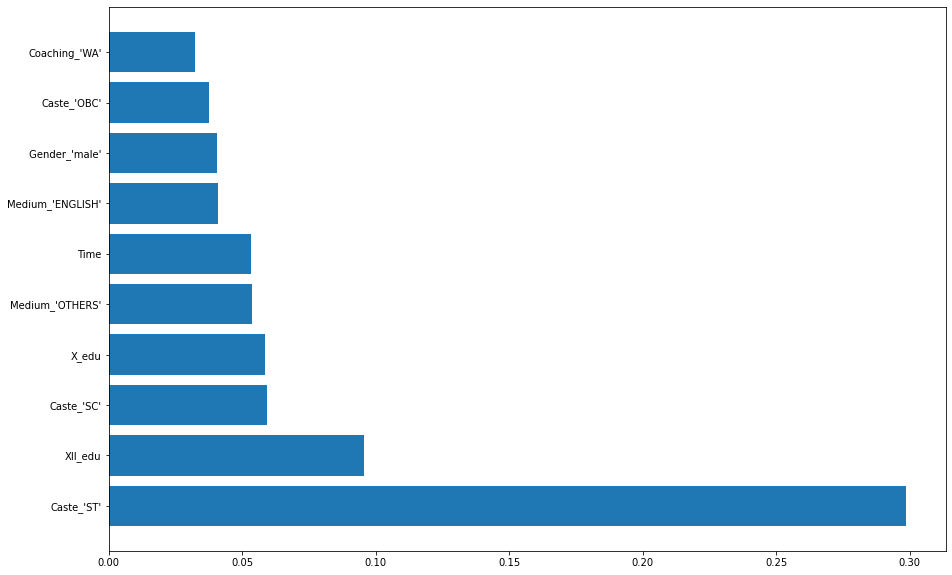

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(imp_feat['features'], imp_feat['imp'])

<BarContainer object of 30 artists>

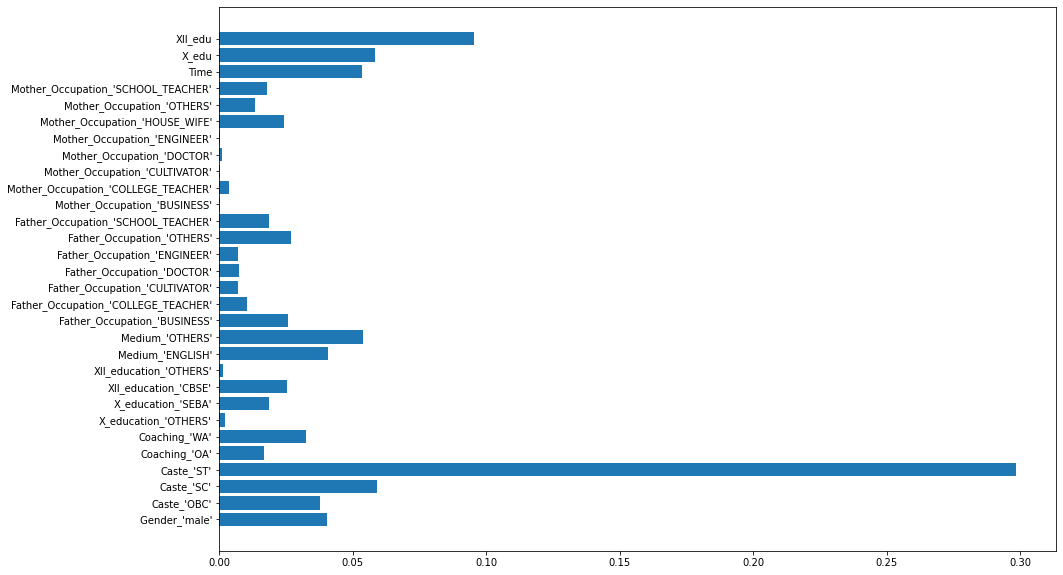

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(feat_imp['features'], feat_imp['imp'])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       117
           1       0.95      0.89      0.92       133

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

AxesSubplot(0.125,0.125;0.62x0.755)


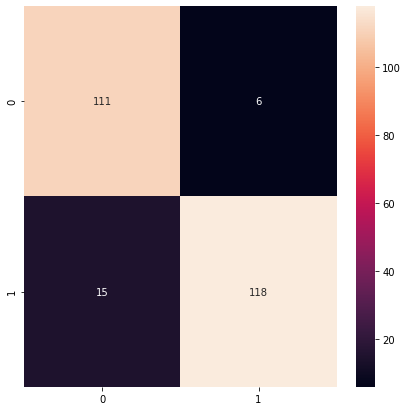

In [ ]:
rf_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, rf_pred))
plt.figure(figsize=(7,7))
print(sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='g'))
plt.show()

In [ ]:
rf_proba = rf_classifier.predict_proba(X_test)

In [ ]:
rf_positive = rf_proba[:, 1]

In [ ]:
rf_positive[:10]

array([0.99      , 0.        , 0.16666667, 0.9       , 0.915     ,
       0.044     , 0.8       , 0.05      , 0.04      , 0.16      ])

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       117
           1       0.95      0.80      0.87       133

    accuracy                           0.87       250
   macro avg       0.88      0.88      0.87       250
weighted avg       0.88      0.87      0.87       250

AxesSubplot(0.125,0.125;0.62x0.755)


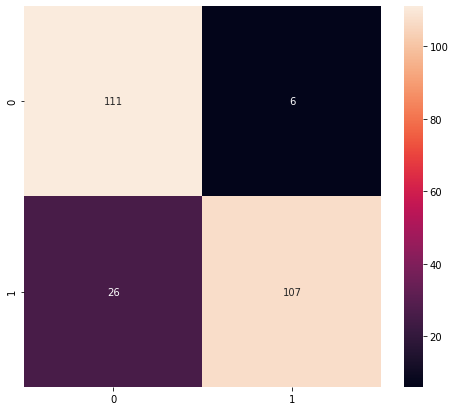

In [ ]:
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))
plt.figure(figsize=(8,7))
print(sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='g'))
plt.show()

In [ ]:
dt_proba = dt_model.predict_proba(X_test)
dt_positive= dt_proba[:,1]

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       117
           1       0.91      0.93      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

AxesSubplot(0.125,0.125;0.62x0.755)


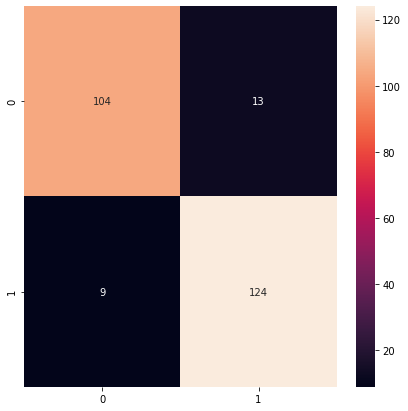

In [ ]:
log_pred = log_classifier.predict(X_tests)
print(classification_report(y_test, log_pred))
plt.figure(figsize=(7,7))
print(sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='g'))
plt.show()

In [ ]:
log_proba = log_classifier.predict_proba(X_tests)
log_positive= log_proba[:,1]

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       117
           1       0.93      0.86      0.89       133

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

AxesSubplot(0.125,0.125;0.62x0.755)


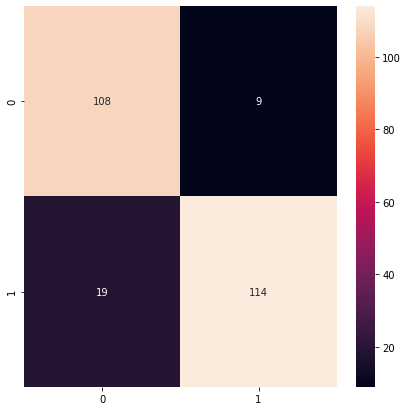

In [ ]:
knn_pred = knn_classifier.predict(X_tests)
print(classification_report(y_test, knn_pred))
plt.figure(figsize=(7,7))
print(sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g'))
plt.show()

In [ ]:
knn_proba = knn_classifier.predict_proba(X_tests)
knn_positive= knn_proba[:,1]

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       139
           1       0.89      0.29      0.44       111

    accuracy                           0.67       250
   macro avg       0.76      0.63      0.60       250
weighted avg       0.75      0.67      0.62       250

AxesSubplot(0.125,0.125;0.62x0.755)


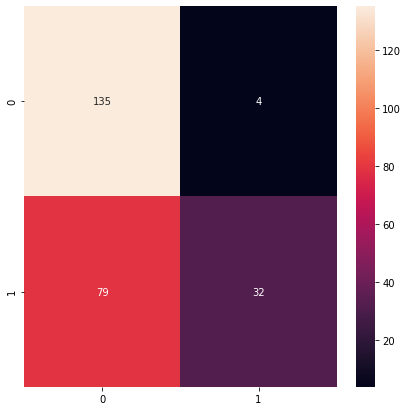

In [ ]:
nb_pred = nb_classifier.predict(X_tests)
print(classification_report(y_test, nb_pred))
plt.figure(figsize=(7,7))
print(sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='g'))
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       117
           1       0.90      0.92      0.91       133

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

AxesSubplot(0.125,0.125;0.62x0.755)


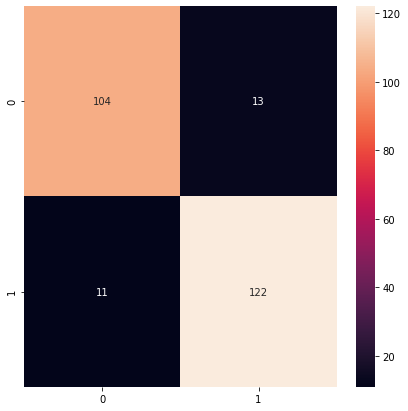

In [ ]:
svm_pred = svm_classifier.predict(X_tests)
print(classification_report(y_test, svm_pred))
plt.figure(figsize=(7,7))
print(sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='g'))
plt.show()

In [ ]:
svm_proba = svm_classifier.predict_proba(X_tests)
svm_positive= svm_proba[:,1]

In [ ]:
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_positive)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_positive)
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_positive)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_positive)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_positive)

In [ ]:
def plot_roc_curve(fpr, tpr, model):
  plt.figure(figsize=(10,7))
  plt.plot(fpr, tpr, color='green', label='Roc curve')
  plt.plot([0,1],[0,1], color='green', linestyle='--')
  plt.xlabel('false positive rate (fpr)')
  plt.ylabel('True positive rate (tpr)')
  plt.title('Roc curve of {}'.format(model))
  plt.legend()
  plt.show()

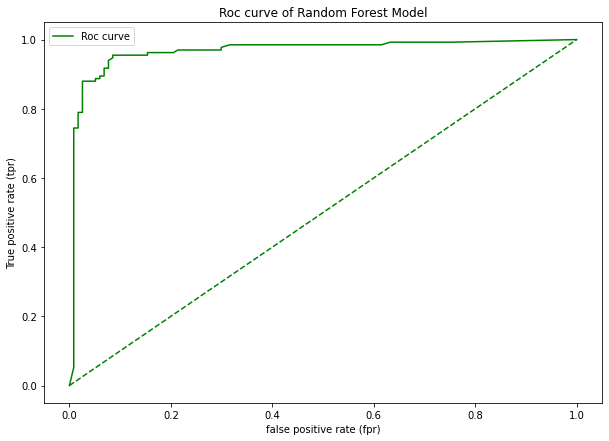

In [ ]:
plot_roc_curve(rf_fpr, rf_tpr, 'Random Forest Model')

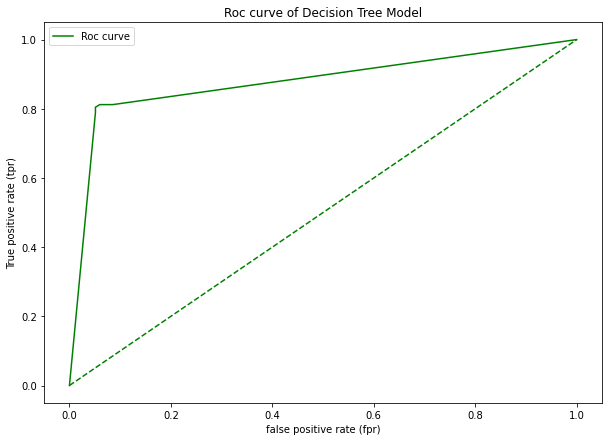

In [ ]:
plot_roc_curve(dt_fpr, dt_tpr, 'Decision Tree Model')

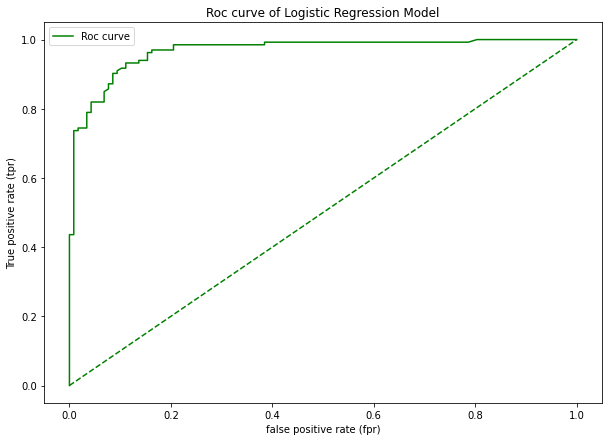

In [ ]:
plot_roc_curve(log_fpr, log_tpr, 'Logistic Regression Model')

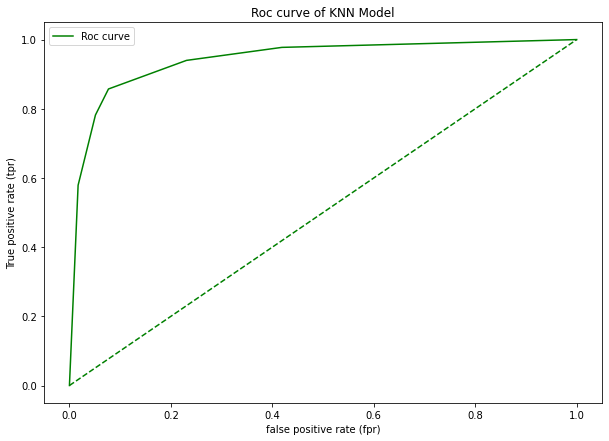

In [ ]:
plot_roc_curve(knn_fpr, knn_tpr, 'KNN Model')

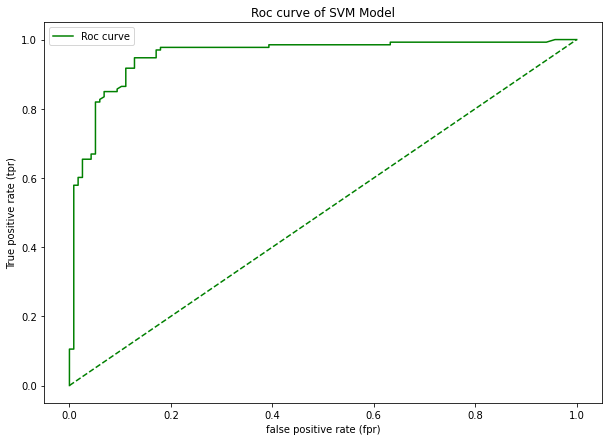

In [ ]:
plot_roc_curve(svm_fpr, svm_tpr, 'SVM Model')

In [ ]:
rf_auc_score = roc_auc_score(y_test, rf_positive)
rf_auc_score

0.9668401773664931

In [ ]:
dt_auc_score = roc_auc_score(y_test, dt_positive)
dt_auc_score

0.8765503502345607

In [ ]:
log_auc_score = roc_auc_score(y_test, log_positive)
log_auc_score

0.9673542831437568

In [ ]:
knn_auc_score = roc_auc_score(y_test, knn_positive)
knn_auc_score

0.9423558897243107

In [ ]:
svm_auc_score = roc_auc_score(y_test, svm_positive)
svm_auc_score

0.9527022684917421

In [ ]:
rf_Gcv_pred = rf_GCV.predict(X_test)
dt_Gcv_pred = dt_GCV.predict(X_test)
knn_Gcv_pred = Knn_GCV.predict(X_tests)
log_Gcv_pred = log_GCV.predict(X_tests)
svm_Gcv_pred = svm_GCV.predict(X_tests)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       117
           1       0.94      0.90      0.92       133

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

AxesSubplot(0.125,0.125;0.62x0.755)


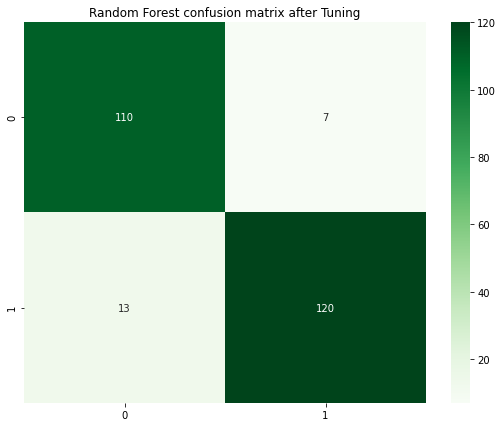

In [ ]:
print(classification_report(y_test, rf_Gcv_pred))
plt.figure(figsize=(9,7))
print(sns.heatmap(confusion_matrix(y_test, rf_Gcv_pred), annot=True, fmt='g', cmap='Greens'))
plt.title('Random Forest confusion matrix after Tuning')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.96      0.80      0.88       133

    accuracy                           0.88       250
   macro avg       0.89      0.89      0.88       250
weighted avg       0.89      0.88      0.88       250

AxesSubplot(0.125,0.125;0.62x0.755)


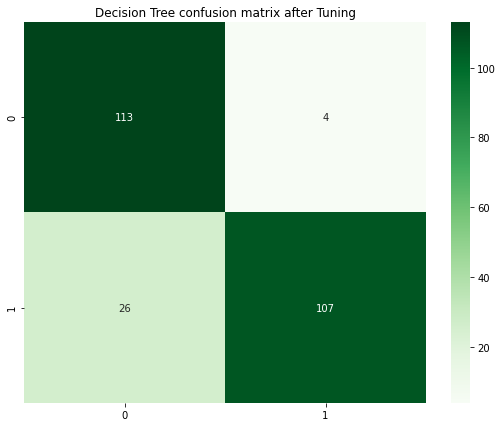

In [ ]:
print(classification_report(y_test, dt_Gcv_pred))
plt.figure(figsize=(9,7))
print(sns.heatmap(confusion_matrix(y_test, dt_Gcv_pred), annot=True, fmt='g', cmap='Greens'))
plt.title('Decision Tree confusion matrix after Tuning')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       117
           1       0.89      0.94      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

AxesSubplot(0.125,0.125;0.62x0.755)


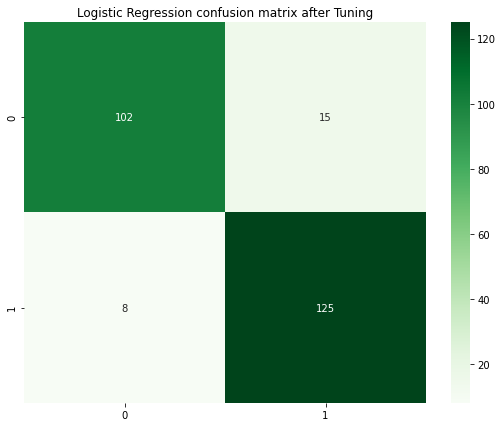

In [ ]:
print(classification_report(y_test, log_Gcv_pred))
plt.figure(figsize=(9,7))
print(sns.heatmap(confusion_matrix(y_test, log_Gcv_pred), annot=True, fmt='g', cmap='Greens'))
plt.title('Logistic Regression confusion matrix after Tuning')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       117
           1       0.93      0.90      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

AxesSubplot(0.125,0.125;0.62x0.755)


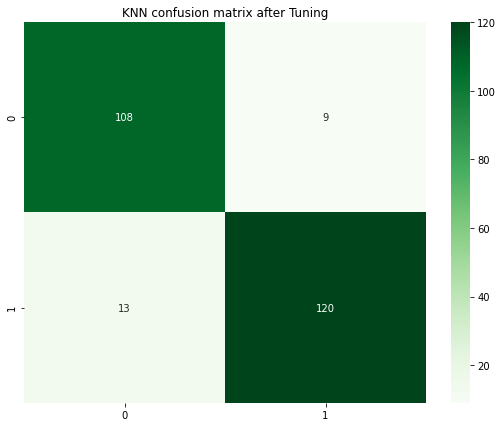

In [ ]:
print(classification_report(y_test, knn_Gcv_pred))
plt.figure(figsize=(9,7))
print(sns.heatmap(confusion_matrix(y_test, knn_Gcv_pred), annot=True, fmt='g', cmap='Greens'))
plt.title('KNN confusion matrix after Tuning')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.88      0.86      0.87       133

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

AxesSubplot(0.125,0.125;0.62x0.755)


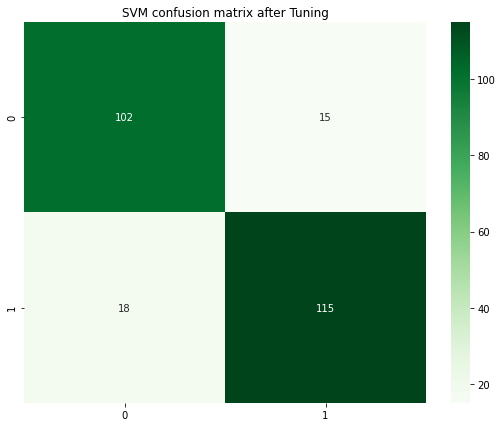

In [ ]:
print(classification_report(y_test, svm_Gcv_pred))
plt.figure(figsize=(9,7))
print(sns.heatmap(confusion_matrix(y_test, svm_Gcv_pred), annot=True, fmt='g', cmap='Greens'))
plt.title('SVM confusion matrix after Tuning')
plt.show()

In [ ]:
rf_gcv_proba = rf_GCV.predict_proba(X_test)
rf_gcv_positve = rf_gcv_proba[:,1]
dt_gcv_proba = dt_GCV.predict_proba(X_test)
dt_gcv_positve = dt_gcv_proba[:,1]
log_gcv_proba = log_GCV.predict_proba(X_tests)
log_gcv_positve = log_gcv_proba[:,1]
knn_gcv_proba = Knn_GCV.predict_proba(X_tests)
knn_gcv_positve = knn_gcv_proba[:,1]
svm_gcv_proba = svm_GCV.predict_proba(X_tests)
svm_gcv_positve = svm_gcv_proba[:,1]

In [ ]:
rf_gcv_fpr, rf_gcv_tpr, rf_gcv_threshold = roc_curve(y_test, rf_gcv_positve)
dt_gcv_fpr, dt_gcv_tpr, dt_gcv_threshold = roc_curve(y_test, dt_gcv_positve)
log_gcv_fpr, log_gcv_tpr, log_gcv_threshold = roc_curve(y_test, log_gcv_positve)
knn_gcv_fpr, knn_gcv_tpr, knn_gcv_threshold = roc_curve(y_test, knn_gcv_positve)
svm_gcv_fpr, svm_gcv_tpr, svm_gcv_threshold = roc_curve(y_test, svm_gcv_positve)

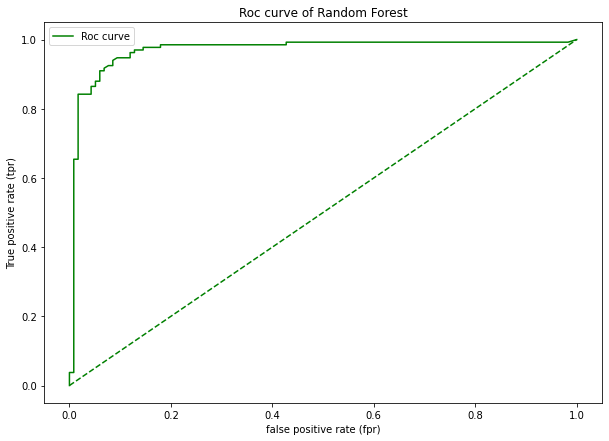

Random Forest AUC score: 0.9690893901420217


In [ ]:
plot_roc_curve(rf_gcv_fpr, rf_gcv_tpr, 'Random Forest')
rf_gcv_auc_score = roc_auc_score(y_test, rf_gcv_positve)
print('Random Forest AUC score:', rf_gcv_auc_score)

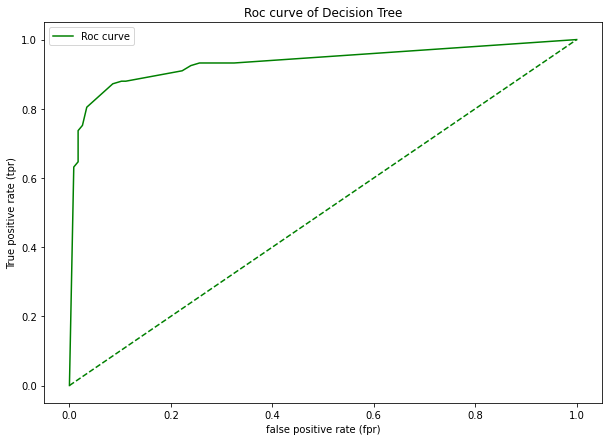

Decision Tree AUC score: 0.9337446179551443


In [ ]:
plot_roc_curve(dt_gcv_fpr, dt_gcv_tpr, 'Decision Tree')
dt_gcv_auc_score = roc_auc_score(y_test, dt_gcv_positve)
print('Decision Tree AUC score:', dt_gcv_auc_score)

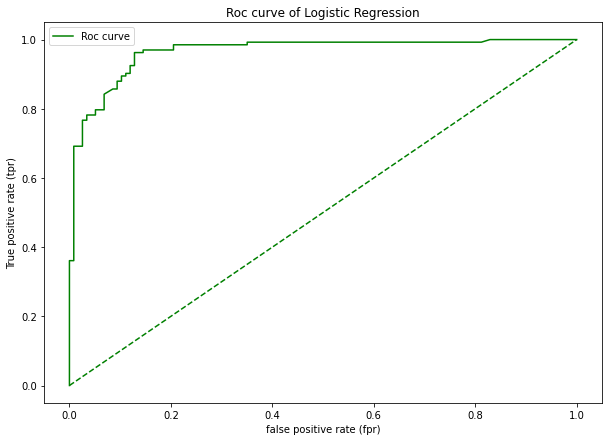

Logistic Regression AUC score: 0.9647194910352805


In [ ]:
plot_roc_curve(log_gcv_fpr, log_gcv_tpr, 'Logistic Regression')
log_gcv_auc_score = roc_auc_score(y_test, log_gcv_positve)
print('Logistic Regression AUC score:',log_gcv_auc_score)

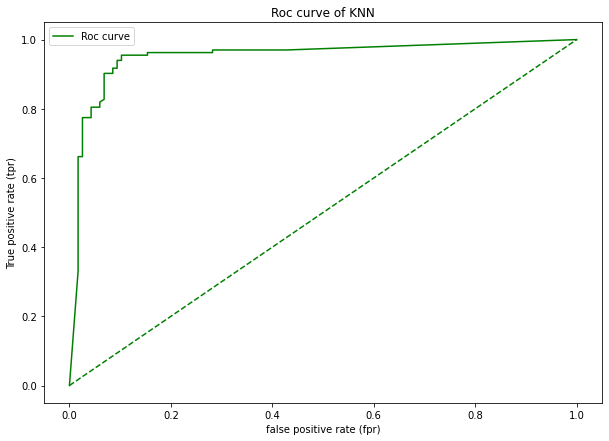

KNN AUC score: 0.951127819548872


In [ ]:
plot_roc_curve(knn_gcv_fpr, knn_gcv_tpr, 'KNN')
knn_gcv_auc_score = roc_auc_score(y_test, knn_gcv_positve)
print('KNN AUC score:',knn_gcv_auc_score)

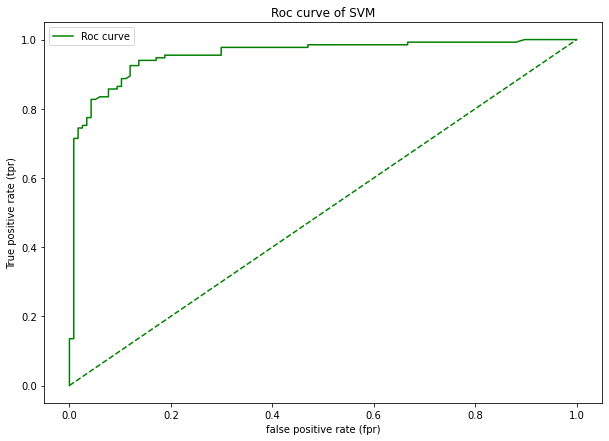

SVM AUC score: 0.9549514812672708


In [ ]:
plot_roc_curve(svm_gcv_fpr, svm_gcv_tpr, 'SVM')
svm_gcv_auc_score = roc_auc_score(y_test, svm_gcv_positve)
print('SVM AUC score:',svm_gcv_auc_score)